In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [ ]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)), #  กำหนด input_shape ให้ layer แรก เพื่อ initialize weight
    Dense(16,activation='relu',name = 'First_hiddenlayer'), # ตั้งชื่อlayer ได้
    Dense(16,activation='relu'),
    Dense(10,activation='softmax')
])

# https://www.tensorflow.org/api_docs/python/tf/keras/activations รายการ activation (เรียกใช้เป็น argument)
'''
# ให้ผลเหมือนกันด้านบน แค่เลเยอร์เอาพุตเราแยกออกเป็น linear layer ตามด้วย softmax
# layerของ activation อยู่ใน tensorflow.keras.layers (เรียกใช้เป็น layer)
model = Sequential([
    Flatten(input_shape=(28,28)), #  กำหนด input_shape ให้ layer แรก เพื่อ initialize weight
    Dense(16,activation='relu'),
    Dense(16),
    Softmax(),
])

'''


In [ ]:
# Print the model summary

# model.weights # ถ้าไม่ได้กำหนด input shape จะทำให้ weight ไม่ initialize >>>> error 
model.summary()

***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [4]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16,(3,3),activation ='relu' ,input_shape = (28,28,1)), # dimension ที่ conv2d ต้องการคือ rank 4 (batchsize,wight,height,channel) โดยที่ batch size จะใส่ให้เองอัตโนมัติ
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10,activation = 'softmax')
])
'''
สามารถกำหนดว่าจะให้ channel ขึ้นก่อนหรือหลัง (default คือ data_format='channels_last')
โดยถ้าปรับต้องปรับทุก layer conv

model = Sequential([
    Conv2D(16,(3,3),activation ='relu',padding = 'same',strides = 2 ,input_shape = (1,28,28),data_format='channels_first'), # dimension ที่ conv2d ต้องการคือ rank 4 (batchsize,wight,height,channel) โดยที่ batch size จะใส่ให้เองอัตโนมัติ
    MaxPooling2D((3,3),data_format='channels_first'),
    Flatten(),
    Dense(10,activation = 'softmax')
])

'''


"\nสามารถกำหนดว่าจะให้ channel ขึ้นก่อนหรือหลัง (default คือ data_format='channels_last')\nโดยถ้าปรับต้องปรับทุก layer conv\n\nmodel = Sequential([\n    Conv2D(16,(3,3),activation ='relu',padding = 'same',strides = 2 ,input_shape = (1,28,28),data_format='channels_first'), # dimension ที่ conv2d ต้องการคือ rank 4 (batchsize,wight,height,channel) โดยที่ batch size จะใส่ให้เองอัตโนมัติ\n    MaxPooling2D((3,3),data_format='channels_first'),\n    Flatten(),\n    Dense(10,activation = 'softmax')\n])\n\n"

In [5]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [6]:
# Define the model optimizer, loss function and metrics

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy','mae']) # metrics เป็น list เพราะใส่ได้หลายอัน



string ที่เป็น alias เอามาจาก parameter name ของแต่ละคลาส object<br> https://www.tensorflow.org/api_docs/python/tf/metrics <br> https://www.tensorflow.org/api_docs/python/tf/keras/losses <br> https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [ ]:

# อีกวิธีนึงคือ pass obect แทน argument เลย เราจะสามารถปรับแต่งพารามิตเอร์ต่างๆได้
# หรือประกาศ object เก็บไว้ในตัวแปร แล้วเอามา pass ใน argument
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = [tf.keras.metrics.SparseCategoricalAccuracy(),tf.keras.losses.MeanAbsoluteError()])  
# tf.keras.metrics.SparseCategoricalAccuracy ใช้กับ SparseCategoricalCrossentropy()

'''
opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
sparseloss = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer = opt,
             loss = sparseloss,
             metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) 
'''



In [7]:
# Print the resulting model attributes

print(model.optimizer)
print(model.optimizer.lr)
print(model.loss)
print(model.metrics)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x7f7de7b23748>, <tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x7f7de42360f0>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [8]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [9]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [10]:
# Print the shape of the training data

train_images.shape # (60000, 28, 28) มีสีชาแนลเดียว (grayscale)

(60000, 28, 28)

In [11]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [12]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

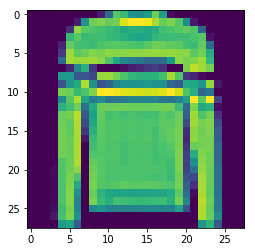

label: Pullover


In [13]:
# Display one of the images

#ใช้ matplotlib
i = 5
img = train_images[i,:,:] # example i all row and column
plt.imshow(img)
plt.show()
print(f'label: {labels[train_labels[i]]}')

In [14]:
# input เข้า conv 2d ต้องเป็น rank 4 tensor
train_images_feed = train_images[:,:,:,np.newaxis]
test_images_feed = test_images[:,:,:,np.newaxis]


In [15]:
print(train_images_feed.shape)
print(test_images_feed.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


#### Fit the model

In [16]:
# Fit the model

# pass train_labels  เป็น interger label SparseCategoricalCrossentropy
history = model.fit(train_images_feed,train_labels ,epochs = 2 , batch_size = 256, verbose = 1) # verbose = 0 ปิดการแสดงผล , 1 , 2 มีกราฟฟิควิ่ง 

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 51s 851us/sample - loss: 0.8673 - accuracy: 0.7261 - mae: 4.4200
Epoch 2/2
60000/60000 [==============================] - 50s 837us/sample - loss: 0.4827 - accuracy: 0.8301 - mae: 4.4200


#### Plot training history

In [17]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history) # history.history เป็น dictionaty  contain ค่าผลของการ train ในแต่ละ epoch แปลงเป็น pandas dataframe
df.head()

,loss,accuracy,mae
0,0.867289,0.726050,4.420001
1,0.482732,0.830067,4.420001


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

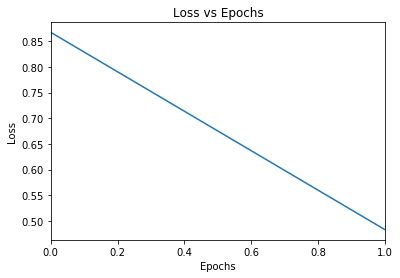

In [18]:
# Make a plot for the loss

loss_plot  = df.plot(y='loss',title = 'Loss vs Epochs' , legend = False)
loss_plot.set(xlabel = 'Epochs',ylabel='Loss')

[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'Epochs')]

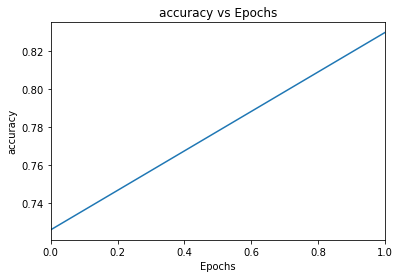

In [19]:
# Make a plot for the accuracy

acc_plot  = df.plot(y='accuracy',title = 'accuracy vs Epochs' , legend = False)
acc_plot.set(xlabel = 'Epochs',ylabel='accuracy')

[Text(0, 0.5, 'mae'), Text(0.5, 0, 'Epochs')]

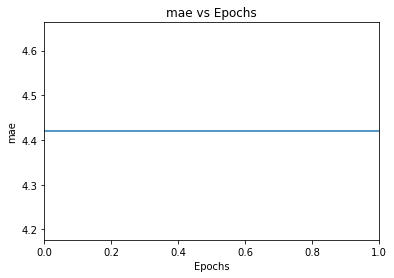

In [20]:
# Make a plot for the additional metric

mae_plot  = df.plot(y='mae',title = 'mae vs Epochs' , legend = False)
mae_plot.set(xlabel = 'Epochs',ylabel='mae')

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [21]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [22]:
# Evaluate the model


test_loss , test_accuracy , test_mae =  model.evaluate(test_images_feed , test_labels,verbose = 2) # อย่าลืมเรื่อง input x ต้องตรงกับ input_shape ใน model

10000/1 - 5s - loss: 0.3665 - accuracy: 0.8374 - mae: 4.4200


#### Make predictions from the model

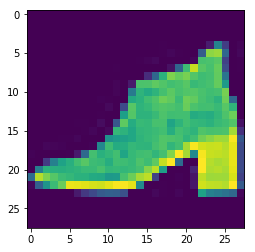

Label: Ankle boot


In [44]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [45]:
# input ตอน predict ก็ต้องเหมือนกับใน model ในที่นี้ (sample, width, height , channel)
test_image  = test_image[np.newaxis,:,:,np.newaxis] # test sample เราหยิบมาด้านบน1ตัวอย่าง ต้องเพิ่ม dimension sample size
print(test_image.shape)

(1, 28, 28, 1)


In [46]:
# Get the model predictions

predictions = model.predict(test_image)

In [47]:
print(predictions)

[[3.2711392e-07 6.0318129e-08 7.1158465e-06 3.9317885e-07 9.5781161e-07
  4.2002900e-03 2.4985404e-06 1.1769355e-03 3.5227895e-05 9.9457622e-01]]


In [48]:
print(f'Model predict: {labels[np.argmax(predictions)]}') # np.argmax(predictions) เลือก index ที่มีค่า prob สูงสุด

Model predict: Ankle boot
